# Embedded Ethics student feedback

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals


In [5]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee


deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]

# current semester (for script purposes)
semester = "F2025"

In [6]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [7]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)
cg_data = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
data_all = [ee_data_full, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

In [8]:
# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

Separate out the data per course

In [9]:
course_data = {}
for course in courses:
    if course in courses_ee:
        course_data[course] = ee_data[ee_data["EE course"][course] == 1]

        # TODO: test this
        if course in cg_data["EE course"].columns:
            course_data[course] = pd.concat([course_data[course], cg_data[cg_data["EE course"][course] == 1]])
    else:
        course_data[course] = cg_data[cg_data["CG course"][course] == 1]
        
course_data["None"] = ee_data_full[ee_data_full["EE course"]["None"] == 1]

## Likert-scale feedback

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


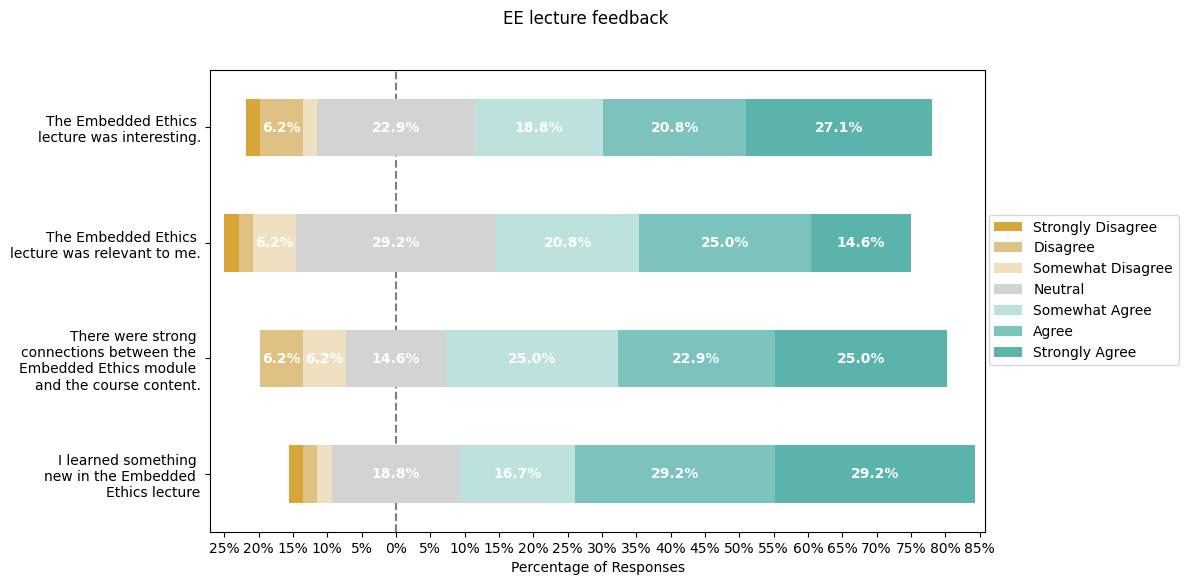

In [10]:
fig, ax = plt.subplots(figsize=(10, 6)) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Lecture feedback"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=ax)

fig.suptitle("EE lecture feedback")
ax.set_yticklabels(["The Embedded Ethics \nlecture was interesting.",
                     "The Embedded Ethics \nlecture was relevant to me.",
                     "There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.",
                     "I learned something \nnew in the Embedded \nEthics lecture"][::-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.1, 0.65))

### Likert scale feedback per course
TODO: account for students enrolled in multiple EE courses

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_l

[Text(0, 0, 'I learned something \nnew in the Embedded \nEthics lecture'),
 Text(0, 1, 'There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.'),
 Text(0, 2, 'The Embedded Ethics \nlecture was relevant to me.'),
 Text(0, 3, 'The Embedded Ethics \nlecture was interesting.')]

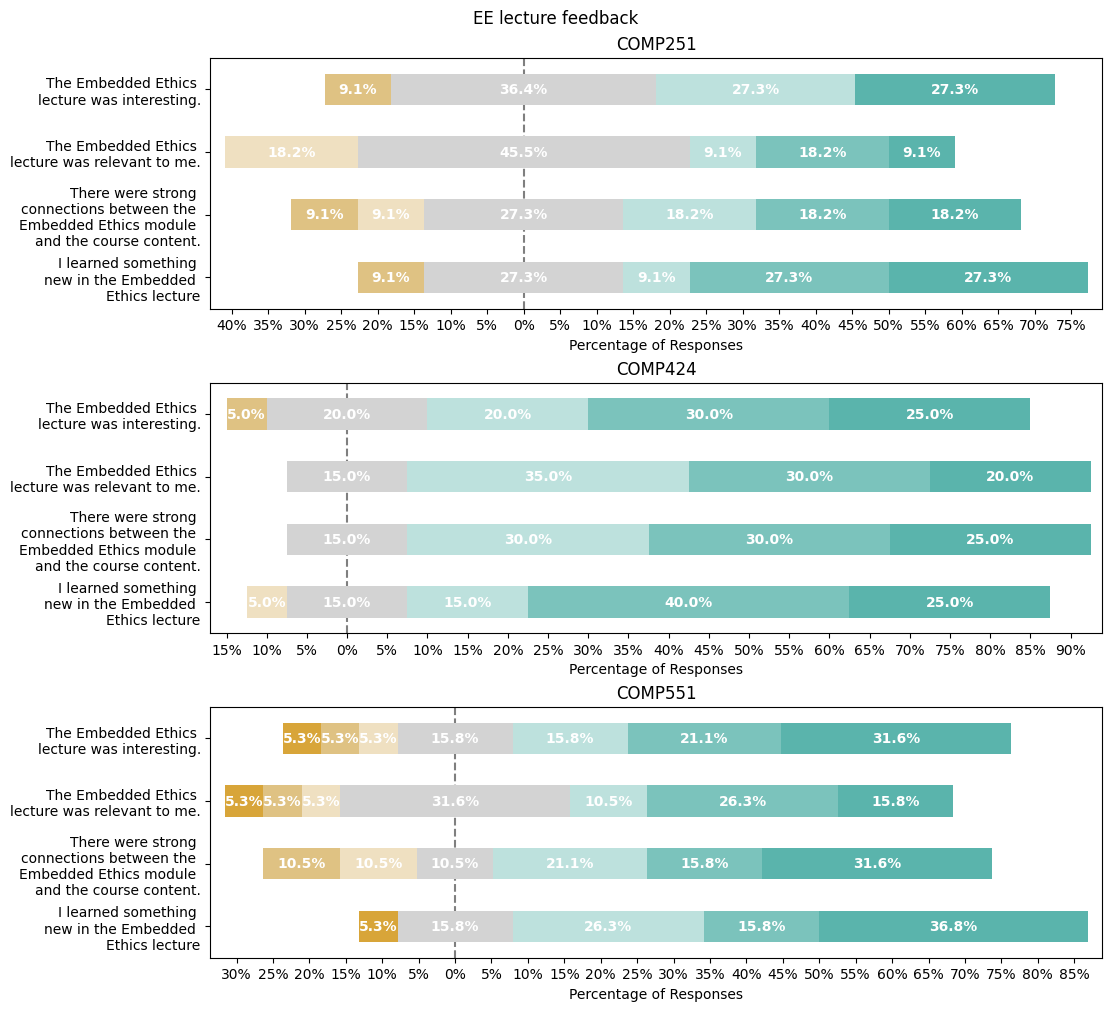

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

for i, course in enumerate(courses_ee):
    plot_likert.plot_likert(course_data[course]["Lecture feedback"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=axes[i])
    axes[i].set_title(course)

fig.suptitle("EE lecture feedback")
axes[0].set_yticklabels(["The Embedded Ethics \nlecture was interesting.",
                    "The Embedded Ethics \nlecture was relevant to me.",
                    "There were strong \nconnections between the \nEmbedded Ethics module \nand the course content.",
                    "I learned something \nnew in the Embedded \nEthics lecture"][::-1])
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, likert_values, loc="lower right")

## Written feedback

In [12]:
# save feedback in a file
ee_topic_feedback = list(ee_data["EE topic feedback"][~ee_data["EE topic feedback"].isna()])
f = open(os.path.join(project_root, 'results', f'{semester}_ee_topic_feedback.txt'), 'w')
for comment in ee_topic_feedback:
    f.write(comment + "\n\n")
f.close()

### Create a wordcloud
This will help visually see whether we have common topics

In [14]:
from wordcloud import STOPWORDS, WordCloud

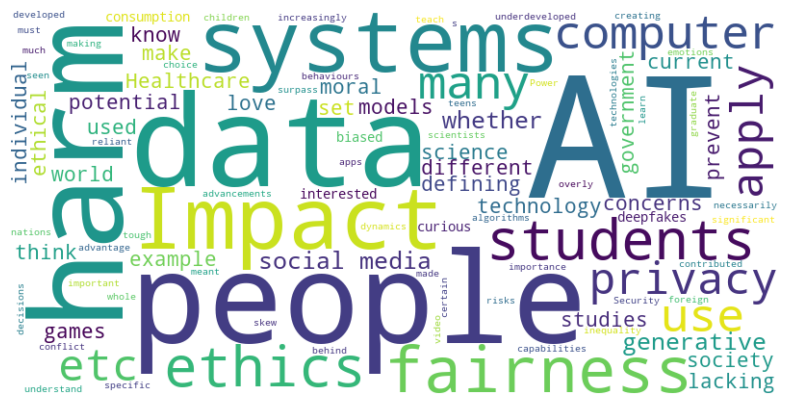

In [ ]:
text = " ".join(comment for comment in ee_topic_feedback)

# Instantiate and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, contour_color='steelblue').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()